# IMPORTING ALL MODULES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
data=pd.read_csv("C:/Users/shrad/OneDrive/Desktop/Covid19_Data.csv" , parse_dates = ['Date'])

In [6]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0


In [7]:
data.rename(columns={'Date':'date',
                           'Province/State':'state',
                           'Country/Region':'country',
                           'Lat':'lat','Long':'long',
                           'Confirmed':'confirmed',
                           'Deaths':'death','Recovered':'recovered'
                           } , inplace=True)

In [8]:
data['active']=data['confirmed']-data['death']-data['recovered']

In [9]:
top = data[data['date'] == data['date'].max()]
top

,state,country,lat,long,date,confirmed,death,recovered,active
18910,NaN,Thailand,15.0000,101.0000,2020-03-23,599.0,1.0,44.0,554.0
18911,NaN,Japan,36.0000,138.0000,2020-03-23,1086.0,40.0,235.0,811.0
18912,NaN,Singapore,1.2833,103.8333,2020-03-23,455.0,2.0,144.0,309.0
18913,NaN,Nepal,28.1667,84.2500,2020-03-23,2.0,0.0,1.0,1.0
18914,NaN,Malaysia,2.5000,112.5000,2020-03-23,1306.0,10.0,139.0,1157.0
...,...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0,0.0


In [12]:
world = top.groupby('country')[['confirmed', 'active', 'death']].sum().reset_index()
world

,country,confirmed,active,death
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0
...,...,...,...,...
178,Uzbekistan,43.0,43.0,0.0
179,Venezuela,70.0,55.0,0.0
180,Vietnam,113.0,96.0,0.0
181,Zambia,3.0,3.0,0.0


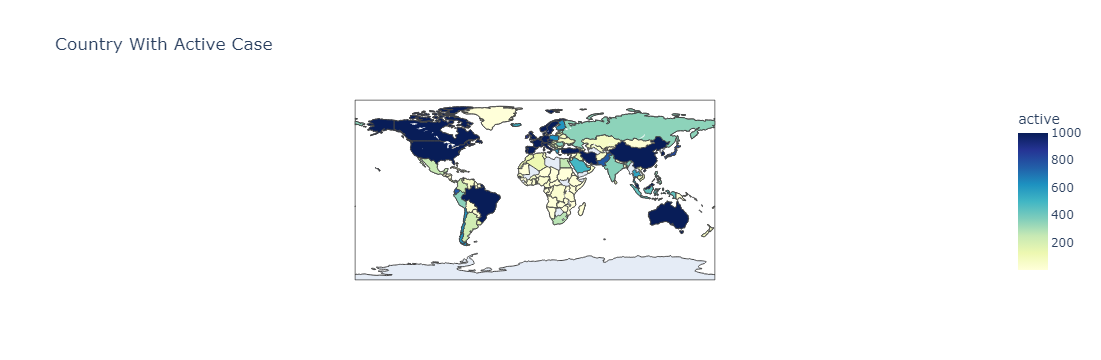

In [15]:
figure = px.choropleth(world , locations="country",
                      locationmode='country names',color='active',
                      hover_name="country",range_color=[1,1000],
                      color_continuous_scale = "ylgnbu",
                      title='Country With Active Case')
figure.show()


In [17]:
top_actives= top.groupby(by='country')['active'].sum().sort_values(ascending = False).head(20).reset_index()
top_actives

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

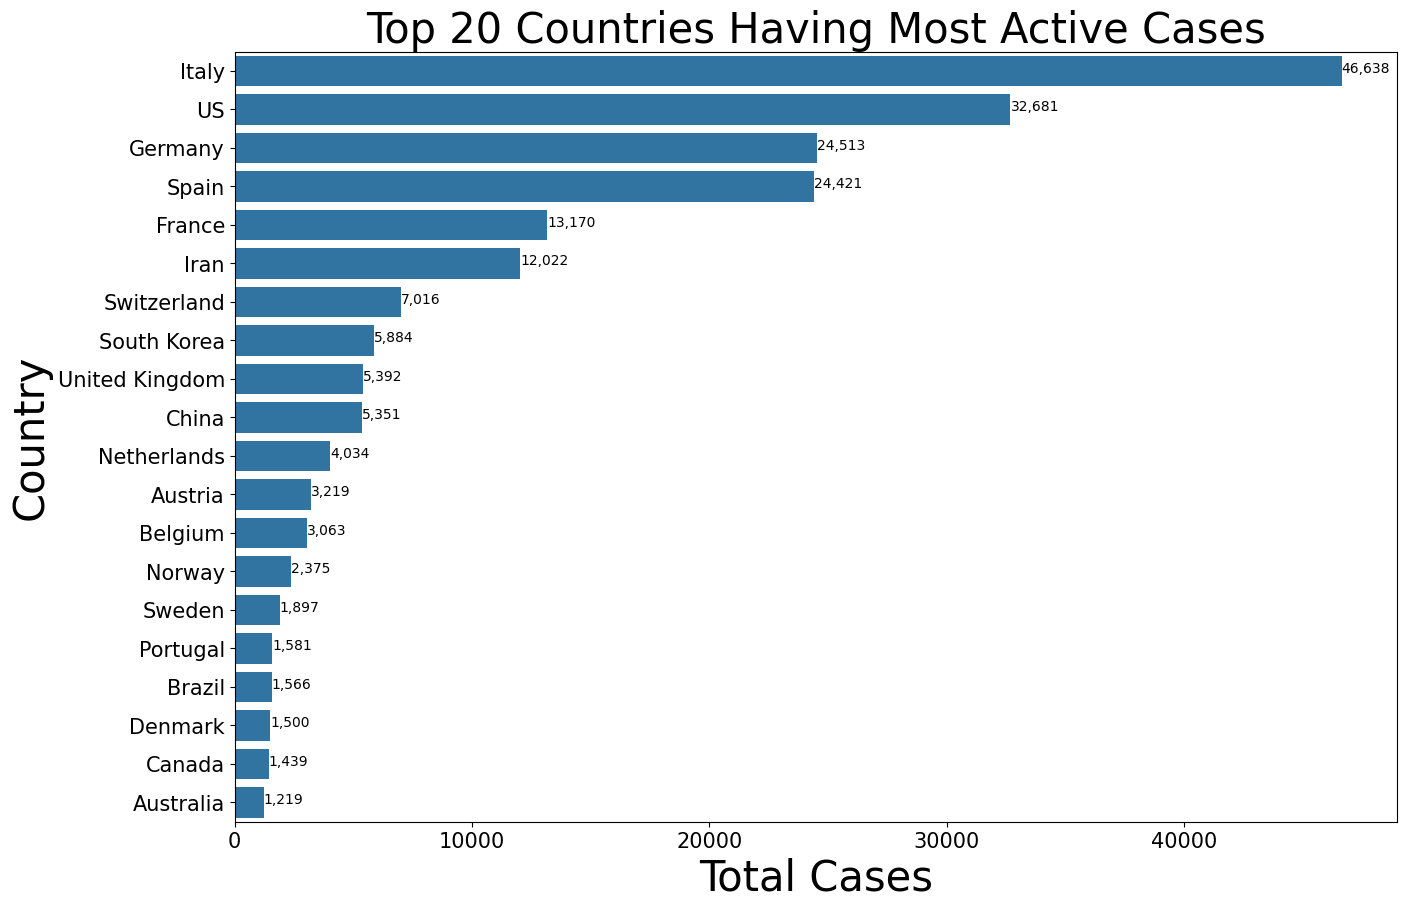

In [18]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases",fontsize= 30)
plt.ylabel("Country",fontsize = 30)
plt.title("Top 20 Countries Having Most Active Cases" , fontsize = 30)
ax = sns.barplot( x = top_actives.active , y = top_actives.country)
for i, (value , name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.06 , f'{value:,.0f}',size = 10 , ha= 'left', va= 'center')
ax.set(xlabel='Total Cases',ylabel='Country')  

In [20]:
top_deaths= top.groupby(by='country')['death'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,country,death
0,Italy,5476.0
1,China,3274.0
2,Spain,1772.0
3,Iran,1685.0
4,France,674.0
5,US,417.0
6,United Kingdom,282.0
7,Netherlands,180.0
8,South Korea,104.0
9,Switzerland,98.0


[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

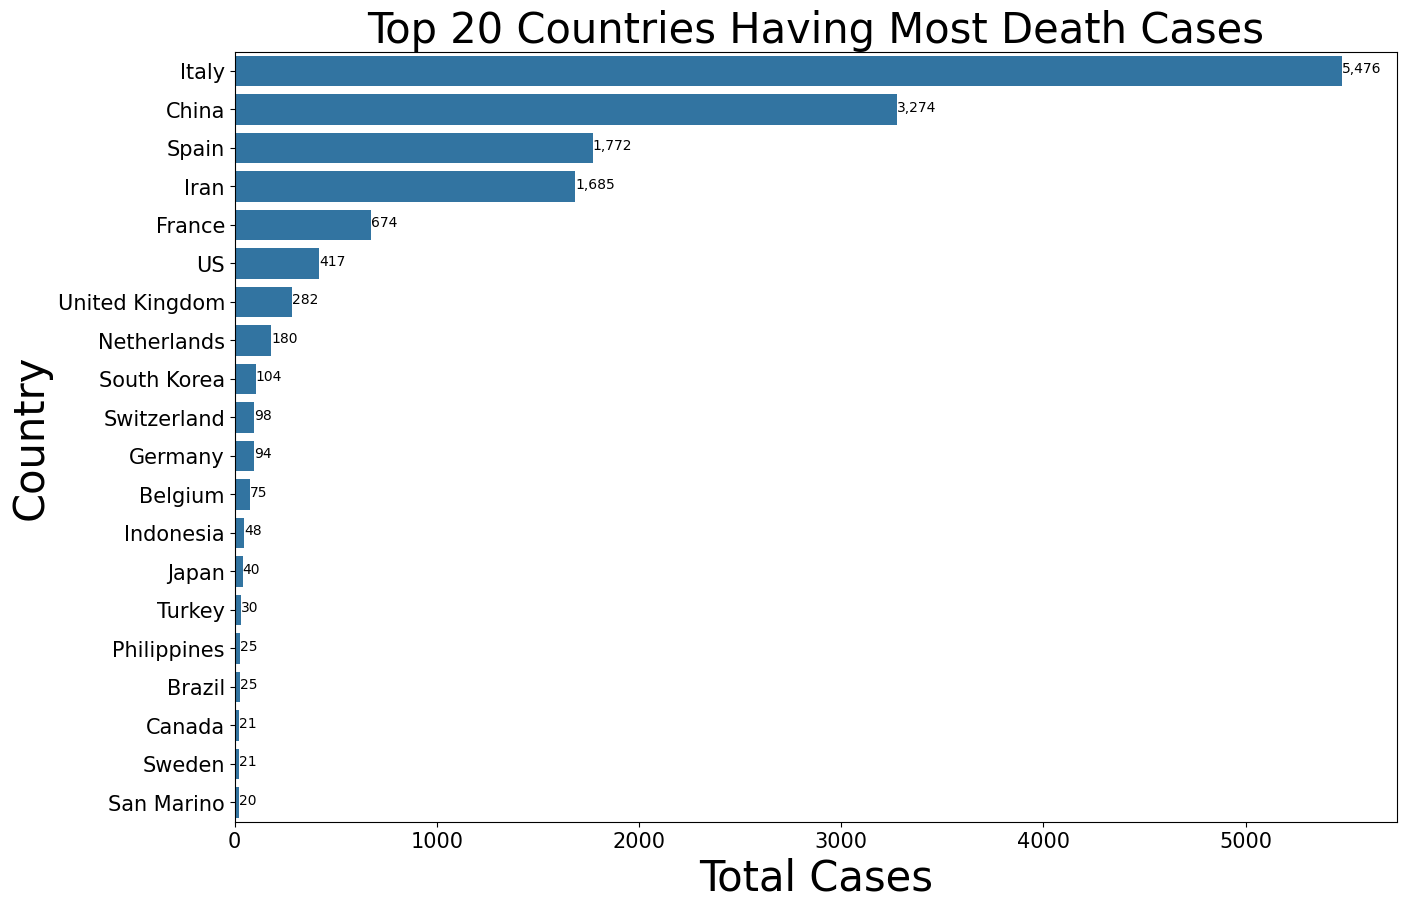

In [21]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases",fontsize= 30)
plt.ylabel("Country",fontsize = 30)
plt.title("Top 20 Countries Having Most Death Cases" , fontsize = 30)
ax = sns.barplot( x = top_deaths.death , y = top_deaths.country)
for i, (value , name) in enumerate(zip(top_deaths.death, top_deaths.country)):
    ax.text(value, i-.05 , f'{value:,.0f}',size = 10 , ha= 'left', va= 'center')
ax.set(xlabel='Total Cases',ylabel='Country') 


In [22]:
top_recovered= top.groupby(by='country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

,country,recovered
0,China,72814.0
1,Iran,7931.0
2,Italy,7024.0
3,South Korea,2909.0
4,Spain,2575.0
5,France,2200.0
6,Cruise Ship,325.0
7,Germany,266.0
8,Belgium,263.0
9,Japan,235.0


[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

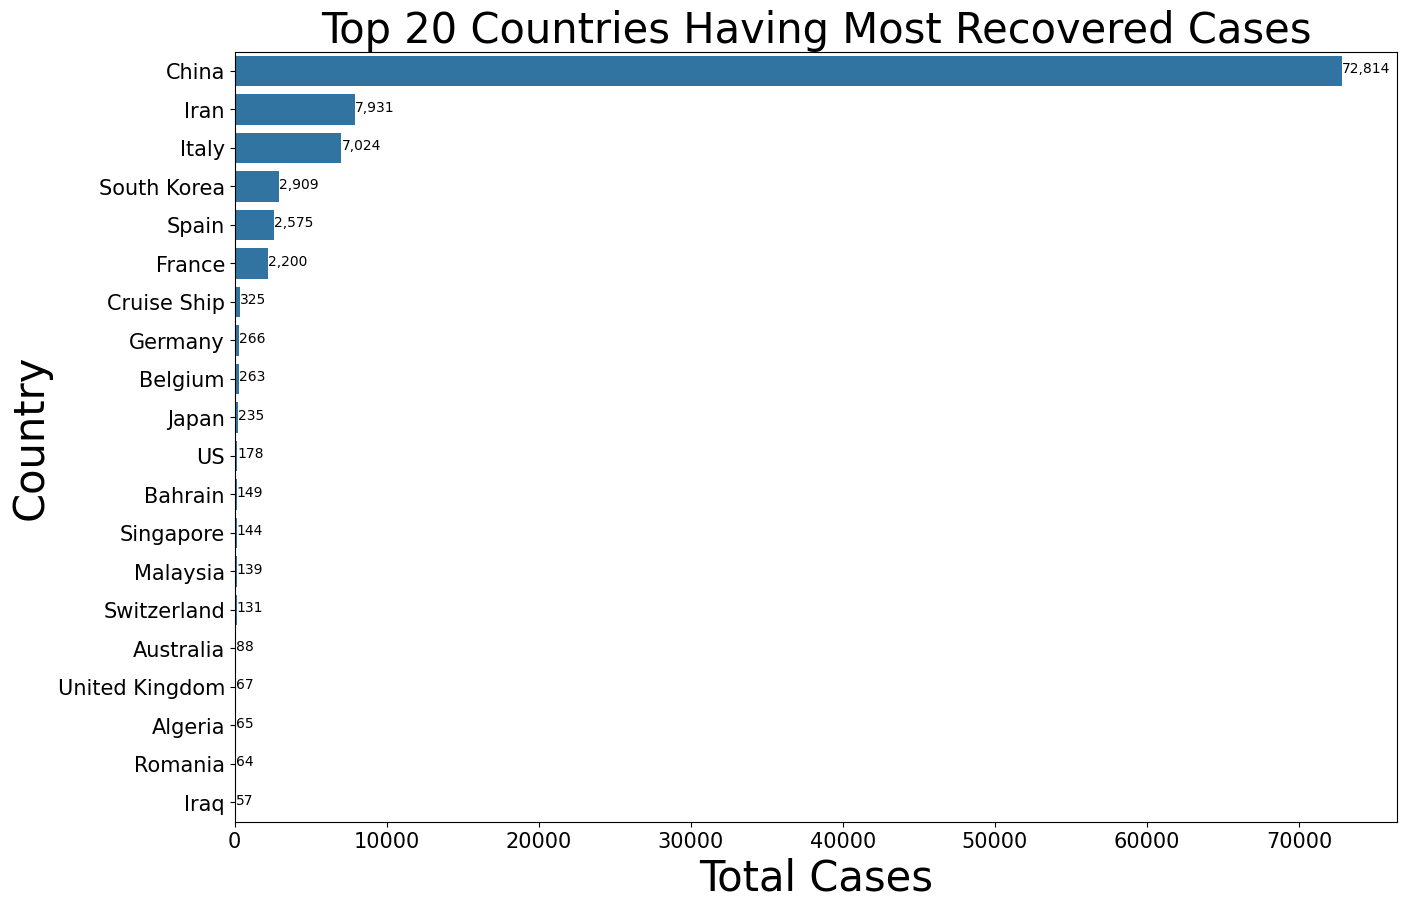

In [23]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases",fontsize= 30)
plt.ylabel("Country",fontsize = 30)
plt.title("Top 20 Countries Having Most Recovered Cases" , fontsize = 30)
ax = sns.barplot( x = top_recovered.recovered, y =top_recovered.country)
for i, (value , name) in enumerate(zip(top_recovered.recovered, top_recovered.country)):
    ax.text(value, i-.05 , f'{value:,.0f}',size = 10 , ha= 'left', va= 'center')
ax.set(xlabel='Total Cases',ylabel='Country') 

In [24]:
china=data[data.country == "China"]
china = china.groupby (by = 'date')[['recovered','death','confirmed','active']].sum().reset_index()

In [25]:
india=data[data.country == "India"]
india = india.groupby (by = 'date')[['recovered','death','confirmed','active']].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index',axis = 1)

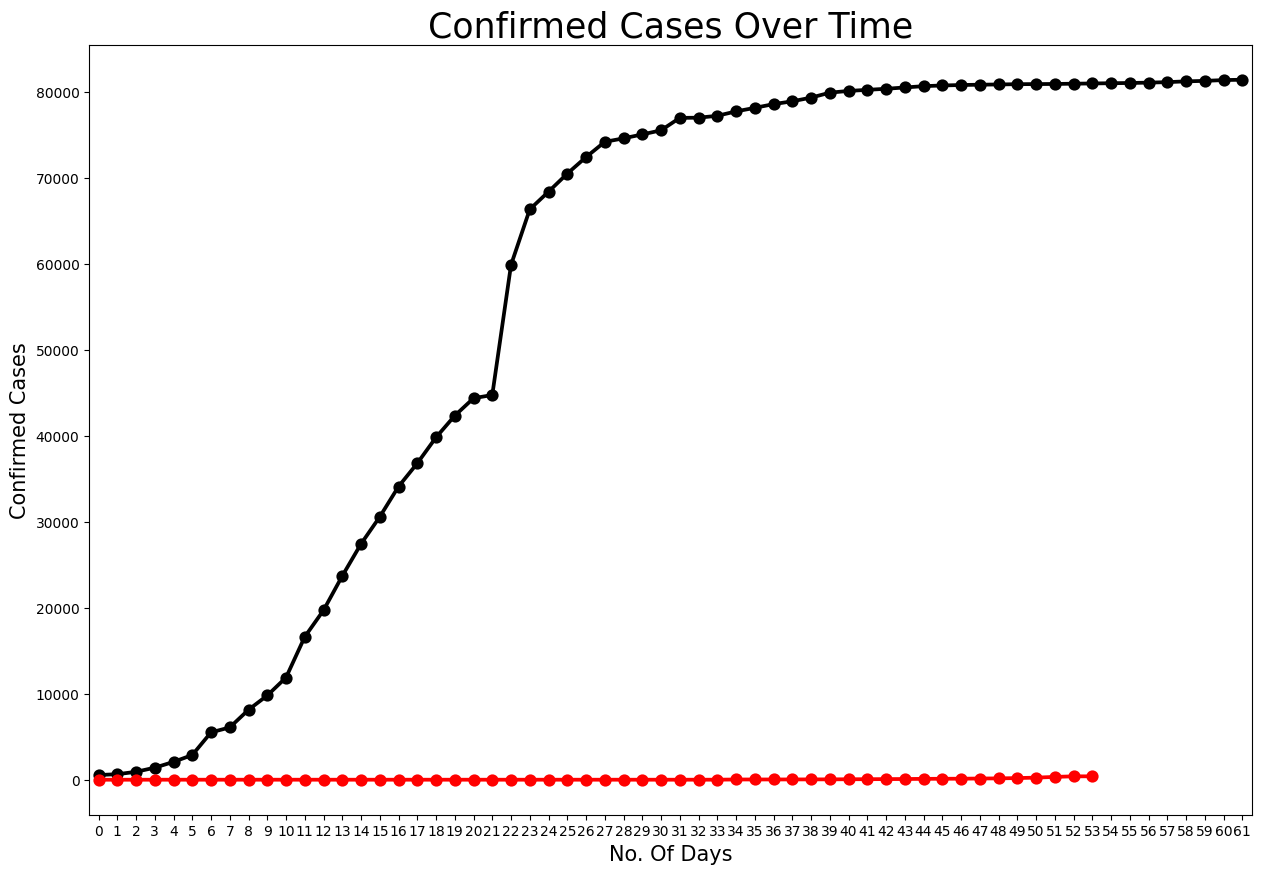

In [29]:
plt.figure(figsize=(15,10))

sns.pointplot(x=china.index , y=china.confirmed , color="Black")
sns.pointplot(x=india.index , y=india.confirmed , color="Red")

plt.title("Confirmed Cases Over Time", fontsize = 25)
plt.ylabel('Confirmed Cases',fontsize = 15)
plt.xlabel('No. Of Days', fontsize = 15)
plt.show()

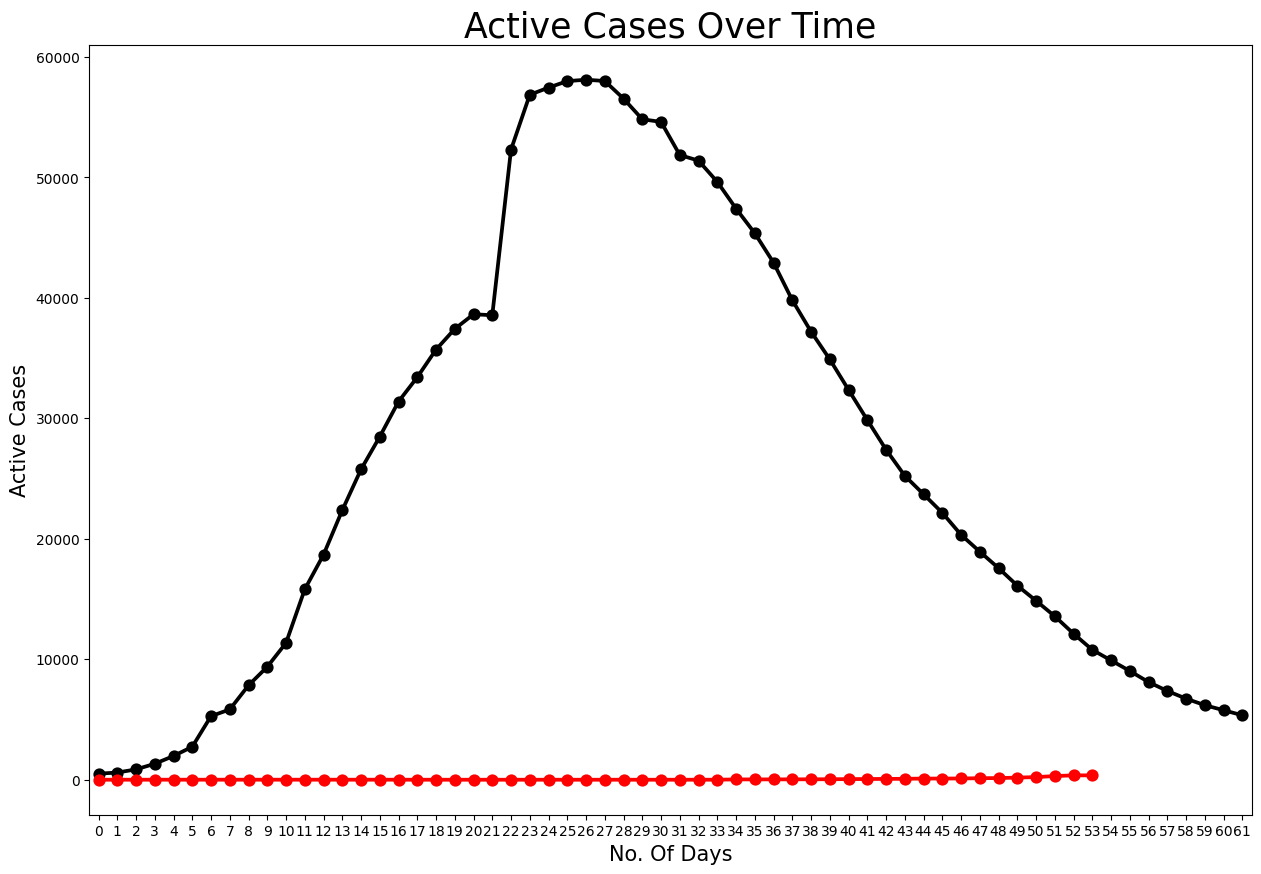

In [30]:
plt.figure(figsize=(15,10))

sns.pointplot(x=china.index , y=china.active , color="Black")
sns.pointplot(x=india.index , y=india.active , color="Red")

plt.title("Active Cases Over Time", fontsize = 25)
plt.ylabel('Active Cases',fontsize = 15)
plt.xlabel('No. Of Days', fontsize = 15)
plt.show()

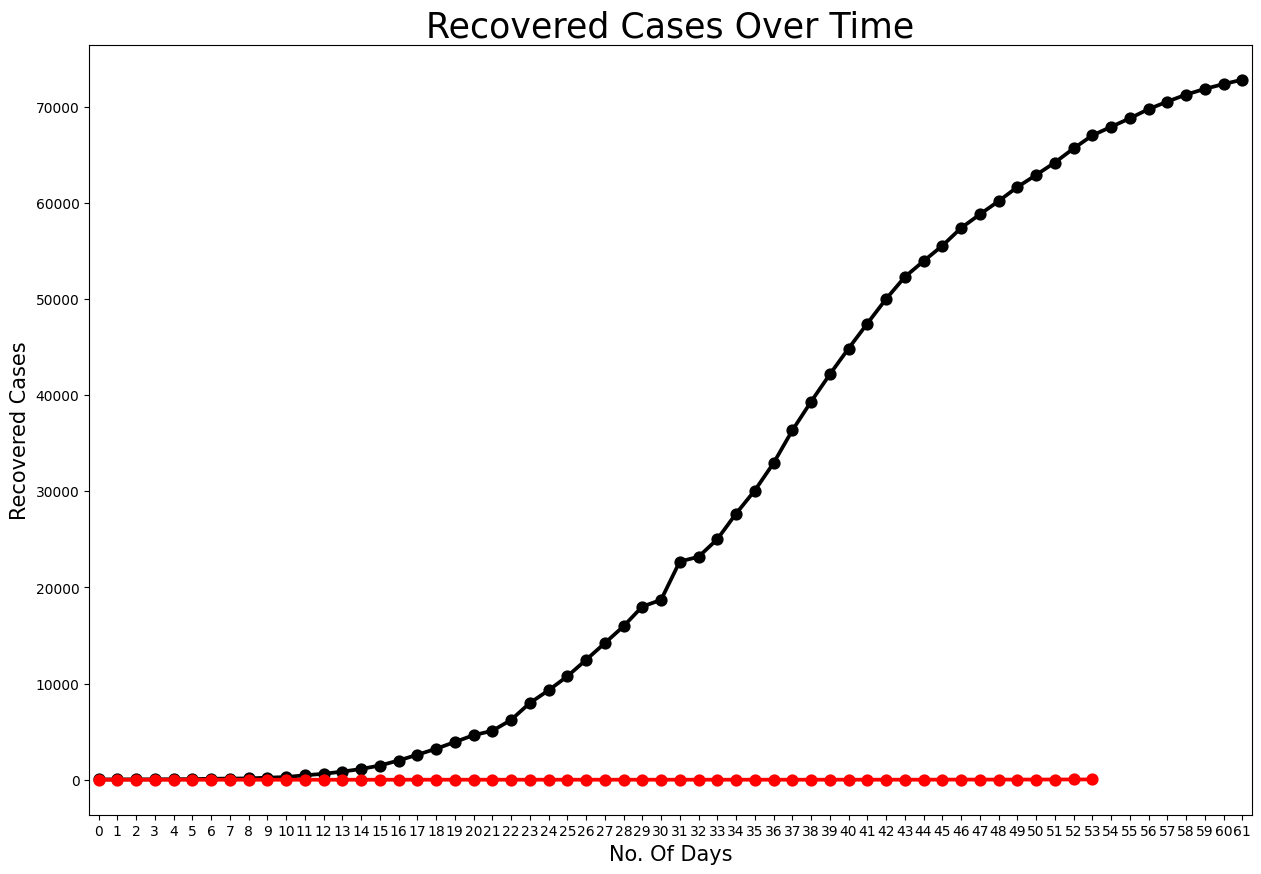

In [31]:
plt.figure(figsize=(15,10))

sns.pointplot(x=china.index , y=china.recovered , color="Black")
sns.pointplot(x=india.index , y=india.recovered , color="Red")

plt.title("Recovered Cases Over Time", fontsize = 25)
plt.ylabel('Recovered Cases',fontsize = 15)
plt.xlabel('No. Of Days', fontsize = 15)
plt.show()


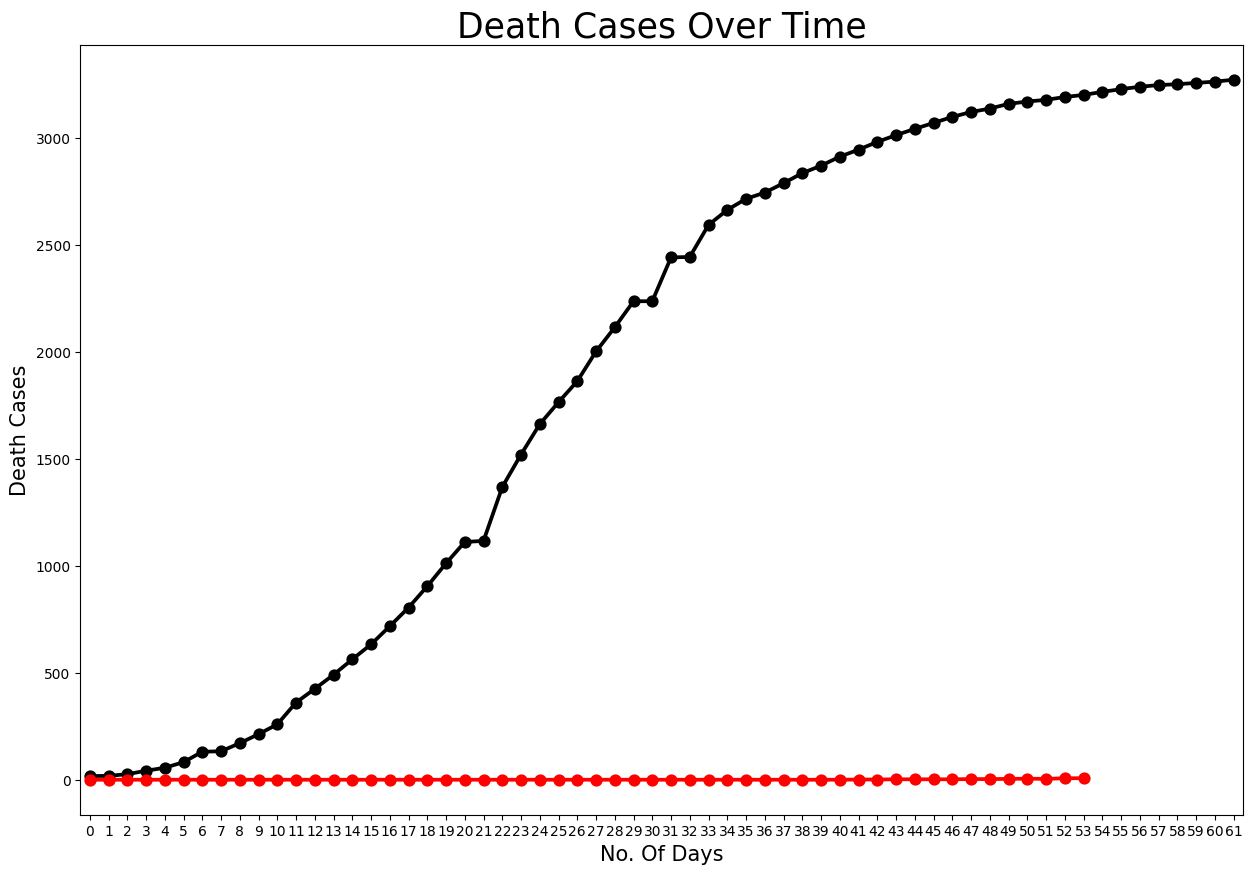

In [32]:
plt.figure(figsize=(15,10))

sns.pointplot(x=china.index , y=china.death , color="Black")
sns.pointplot(x=india.index , y=india.death , color="Red")

plt.title("Death Cases Over Time", fontsize = 25)
plt.ylabel('Death Cases',fontsize = 15)
plt.xlabel('No. Of Days', fontsize = 15)
plt.show()